## Cargamos todas las librerías y funciones necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.utils import resample

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.preprocessing import LabelEncoder

# Librería necesaria para poder separar en conjuntos de training y testing
from sklearn.model_selection import train_test_split

In [3]:
import category_encoders as ce

In [5]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_score, accuracy_score, f1_score

In [31]:
from sklearn.feature_selection import SelectFromModel

## Lectura del fichero csv y manipulación de los datos

In [6]:
df_selected = pd.read_csv("../data/df_selected.csv")

In [7]:
# Echamos un vistazo rápido a la pinta que tiene el data frame
df_selected

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
0,11575.0,11575.0,11575.0,36,7.35,359.26,A,A4,6,OWN,...,0,8.0,2.0,1.0,0.0,0,Jun,2017,1994,23
1,7200.0,7200.0,7200.0,36,24.85,285.70,E,E3,2,RENT,...,0,2.0,0.0,0.0,0.0,0,Jun,2017,2000,17
2,7500.0,7500.0,7500.0,36,7.35,232.79,A,A4,7,MORTGAGE,...,0,13.0,4.0,0.0,0.0,0,Jun,2017,2013,4
3,10000.0,10000.0,10000.0,60,16.02,243.29,C,C5,7,RENT,...,0,7.0,0.0,2.0,0.0,0,Jun,2017,2006,11
4,14000.0,14000.0,14000.0,36,16.02,492.34,C,C5,7,MORTGAGE,...,0,5.0,1.0,0.0,0.0,0,Jun,2017,2008,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442330,11575.0,11575.0,11575.0,36,15.59,404.61,D,D1,10,RENT,...,0,1.0,0.0,0.0,0.0,0,Jan,2015,1999,16
442331,12000.0,12000.0,12000.0,36,11.99,398.52,B,B5,1,MORTGAGE,...,0,11.0,1.0,0.0,0.0,0,Jan,2015,1995,20
442332,13000.0,13000.0,13000.0,60,15.99,316.07,D,D2,5,RENT,...,0,7.0,0.0,1.0,0.0,0,Jan,2015,2003,12
442333,12000.0,12000.0,12000.0,60,19.99,317.86,E,E3,1,RENT,...,0,6.0,0.0,0.0,0.0,0,Jan,2015,2003,12


In [8]:
df_selected.describe(include = "all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
count,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335,442335.000000,442335,...,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335.000000,442335,442335.000000,442335.000000,442335.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,7,35,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C,C1,NaN,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,Oct,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,124885,26548,NaN,220364,...,NaN,NaN,NaN,NaN,NaN,NaN,56111,NaN,NaN,NaN
mean,14566.416856,14566.416856,14561.066882,42.140378,13.255884,439.935320,NaN,NaN,5.767755,NaN,...,0.002258,4.795908,1.776111,0.147868,0.056475,0.000020,NaN,2014.599414,1998.159006,16.440408
std,8500.018979,8500.018979,8496.756229,10.472109,4.471144,252.505972,NaN,NaN,3.722447,NaN,...,0.047470,3.143748,2.089641,0.397284,0.419215,0.004511,NaN,0.670304,7.464446,7.429709
min,1000.000000,1000.000000,900.000000,36.000000,5.320000,14.010000,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1944.000000,3.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,256.900000,NaN,NaN,2.000000,NaN,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,2014.000000,1994.000000,11.000000
50%,12500.000000,12500.000000,12500.000000,36.000000,12.990000,378.760000,NaN,NaN,6.000000,NaN,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2000.000000,15.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,15.990000,579.720000,NaN,NaN,10.000000,NaN,...,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,NaN,2015.000000,2003.000000,20.000000


In [9]:
# filtro el df_selected en función de si la variable loan_status toma el valor 0 o 1
df_major = df_selected[df_selected.loan_status == 0]
df_minor = df_selected[df_selected.loan_status == 1]

In [10]:
df_minor_upsmapled = resample(df_minor, replace = True, n_samples = 358436, random_state = 12345)
df_minor_upsmapled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
400464,28250.0,28250.0,28250.0,36,15.61,987.76,D,D1,2,MORTGAGE,...,0,9.0,3.0,0.0,0.0,0,Apr,2015,1994,21
366148,12175.0,12175.0,12175.0,60,25.80,363.09,G,G1,1,RENT,...,0,8.0,1.0,0.0,0.0,0,May,2015,1997,18
22099,2000.0,2000.0,2000.0,36,18.54,72.85,E,E1,2,MORTGAGE,...,0,20.0,2.0,1.0,0.0,0,Dec,2014,1988,26
396340,5000.0,5000.0,5000.0,36,14.65,172.48,C,C5,6,OWN,...,0,3.0,0.0,0.0,0.0,0,Mar,2015,1981,34
32729,12400.0,12400.0,12400.0,60,8.67,255.43,B,B1,1,RENT,...,0,1.0,0.0,0.0,0.0,0,Nov,2014,1983,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157970,21075.0,21075.0,20975.0,60,19.47,552.17,D,D5,1,OWN,...,0,4.0,6.0,0.0,0.0,0,May,2014,1994,20
243800,10000.0,10000.0,10000.0,36,12.05,332.39,C,C1,1,OWN,...,0,3.0,0.0,0.0,0.0,0,Dec,2015,2005,10
21700,5825.0,5825.0,5825.0,36,18.54,212.17,E,E1,10,OWN,...,0,4.0,0.0,0.0,2.0,0,Dec,2014,2003,11
236605,35000.0,35000.0,34750.0,36,14.48,1204.40,C,C5,1,MORTGAGE,...,0,5.0,0.0,0.0,1.0,0,Dec,2015,2000,15


In [11]:
df_minor_upsmapled = pd.concat([df_minor_upsmapled, df_major])
df_minor_upsmapled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
400464,28250.0,28250.0,28250.0,36,15.61,987.76,D,D1,2,MORTGAGE,...,0,9.0,3.0,0.0,0.0,0,Apr,2015,1994,21
366148,12175.0,12175.0,12175.0,60,25.80,363.09,G,G1,1,RENT,...,0,8.0,1.0,0.0,0.0,0,May,2015,1997,18
22099,2000.0,2000.0,2000.0,36,18.54,72.85,E,E1,2,MORTGAGE,...,0,20.0,2.0,1.0,0.0,0,Dec,2014,1988,26
396340,5000.0,5000.0,5000.0,36,14.65,172.48,C,C5,6,OWN,...,0,3.0,0.0,0.0,0.0,0,Mar,2015,1981,34
32729,12400.0,12400.0,12400.0,60,8.67,255.43,B,B1,1,RENT,...,0,1.0,0.0,0.0,0.0,0,Nov,2014,1983,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442326,13150.0,13150.0,13150.0,60,14.99,312.77,C,C5,8,MORTGAGE,...,0,0.0,3.0,0.0,0.0,0,Jan,2015,1994,21
442327,12000.0,12000.0,12000.0,36,9.49,384.34,B,B2,4,RENT,...,0,3.0,0.0,0.0,0.0,0,Jan,2015,2006,9
442328,4000.0,4000.0,4000.0,36,8.67,126.59,B,B1,10,MORTGAGE,...,0,8.0,1.0,1.0,0.0,0,Jan,2015,2002,13
442330,11575.0,11575.0,11575.0,36,15.59,404.61,D,D1,10,RENT,...,0,1.0,0.0,0.0,0.0,0,Jan,2015,1999,16


In [12]:
df_minor_upsmapled.loan_status.value_counts()

1    358436
0    345335
Name: loan_status, dtype: int64

In [13]:
df_minor_upsmapled.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status       int64
loan_status               int64
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs             float64
fico_range_low          float64
fico_range_high         float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int64
application_type          int64
acc_open_past_24mths    float64
mort_acc                float64
pub_rec_bankruptcies    float64
tax_liens               float64
disbursement_method       int64
issue_mo

In [14]:
X = df_minor_upsmapled.drop("loan_status", axis = 1)
Y = df_minor_upsmapled.loan_status

In [60]:
Y = LabelEncoder().fit_transform(Y)

### Separamos en training y testing

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

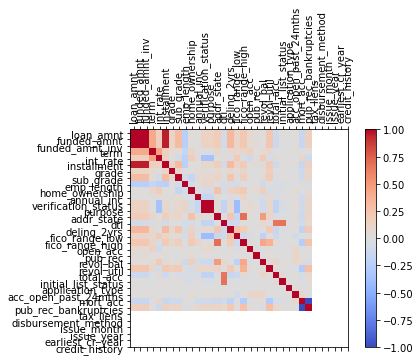

In [55]:
corr = xtrain.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(xtrain.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(xtrain.columns)
ax.set_yticklabels(xtrain.columns)
plt.show()

In [57]:
xtrain.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,...,initial_list_status,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_year,earliest_cr_year,credit_history
loan_amnt,1.000000,1.000000,0.999995,0.406791,0.161657,0.948439,0.118283,0.304552,-0.250805,0.015634,...,0.056498,0.025915,0.015958,0.221003,-0.123119,0.003625,-0.000470,0.015902,-0.146907,0.148815
funded_amnt,1.000000,1.000000,0.999995,0.406791,0.161657,0.948439,0.118283,0.304552,-0.250805,0.015634,...,0.056498,0.025915,0.015958,0.221003,-0.123119,0.003625,-0.000470,0.015902,-0.146907,0.148815
funded_amnt_inv,0.999995,0.999995,1.000000,0.406735,0.161512,0.948428,0.118331,0.304593,-0.250755,0.015524,...,0.057114,0.025891,0.015888,0.221044,-0.123090,0.003609,-0.000467,0.015831,-0.146958,0.148861
term,0.406791,0.406791,0.406735,1.000000,0.459812,0.149934,0.077987,0.045257,-0.171475,0.101297,...,0.137962,0.012167,0.063225,0.084339,-0.025920,-0.014328,-0.000090,0.027493,-0.019780,0.022180
int_rate,0.161657,0.161657,0.161512,0.459812,1.000000,0.147973,0.004041,-0.071876,-0.232072,0.172946,...,-0.097755,0.013777,0.203566,-0.066368,0.044917,0.015261,0.009814,-0.018632,0.112008,-0.114013
installment,0.948439,0.948439,0.948428,0.149934,0.147973,1.000000,0.101350,0.299237,-0.240348,0.005194,...,-0.001623,0.024783,0.026356,0.195446,-0.114637,0.012146,0.000631,0.006114,-0.133299,0.134327
emp_length,0.118283,0.118283,0.118331,0.077987,0.004041,0.101350,1.000000,0.088547,0.009634,0.013717,...,0.017282,-0.019250,0.033848,0.163202,-0.000907,0.005736,-0.003991,-0.012859,-0.112917,0.112263
annual_inc,0.304552,0.304552,0.304593,0.045257,-0.071876,0.299237,0.088547,1.000000,-0.055723,-0.171045,...,0.022090,-0.010332,0.045952,0.194152,-0.051282,0.037010,-0.001729,0.020174,-0.116282,0.118434
verification_status,-0.250805,-0.250805,-0.250755,-0.171475,-0.232072,-0.240348,0.009634,-0.055723,1.000000,-0.062620,...,0.007976,0.000516,-0.097705,-0.000385,-0.038708,-0.033344,-0.001272,-0.025944,0.029157,-0.031462
dti,0.015634,0.015634,0.015524,0.101297,0.172946,0.005194,0.013717,-0.171045,-0.062620,1.000000,...,-0.005662,0.062954,0.162903,-0.057957,-0.038022,-0.035058,0.006538,0.050130,-0.022358,0.026682


In [17]:
xtrain

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
405387,13000.0,13000.0,13000.0,60,7.89,262.91,A,A5,1,MORTGAGE,...,0,6.0,5.0,0.0,0.0,0,Feb,2015,2002,13
234295,10000.0,10000.0,10000.0,36,11.99,332.10,C,C1,10,OWN,...,0,3.0,2.0,0.0,0.0,0,Dec,2015,1997,18
312077,25000.0,25000.0,25000.0,60,9.17,521.03,B,B2,5,MORTGAGE,...,0,4.0,8.0,0.0,0.0,0,Jul,2015,1992,23
292927,35000.0,35000.0,35000.0,60,16.99,869.66,D,D3,10,RENT,...,0,3.0,1.0,0.0,0.0,0,Sep,2015,1990,25
158822,35000.0,35000.0,35000.0,36,20.49,1309.49,E,E2,2,MORTGAGE,...,0,14.0,1.0,0.0,0.0,0,May,2014,1998,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,12000.0,12000.0,11750.0,36,10.91,392.36,B,B4,10,MORTGAGE,...,0,2.0,0.0,0.0,0.0,0,Jun,2017,2003,14
373782,18000.0,18000.0,18000.0,60,9.99,382.36,B,B3,1,MORTGAGE,...,0,4.0,6.0,0.0,0.0,0,Apr,2015,2001,14
412304,12000.0,12000.0,12000.0,60,16.55,295.34,D,D2,10,RENT,...,0,6.0,0.0,0.0,0.0,0,Feb,2015,2002,13
92961,25000.0,25000.0,25000.0,60,14.99,594.62,C,C5,10,MORTGAGE,...,0,2.0,1.0,0.0,0.0,0,Aug,2014,1985,29


In [18]:
cat_xtrain = xtrain.select_dtypes(include=['object']).columns
cat_xtrain

Index(['grade', 'sub_grade', 'home_ownership', 'purpose', 'addr_state',
       'issue_month'],
      dtype='object')

## Hacemos el one hot encoding de las variables

In [19]:
ohe = ce.OneHotEncoder(cols=cat_xtrain)
model = ohe.fit(xtrain)

In [20]:
x_train_t = model.transform(xtrain)

In [21]:
x_test_t = model.transform(xtest)

## Escalado de variables

In [22]:
scaler = StandardScaler()
model_scaled = scaler.fit(x_train_t)
x_train_scaled = pd.DataFrame(scaler.transform(x_train_t), columns=x_train_t.columns, index=x_train_t.index)
x_test_scaled = pd.DataFrame(scaler.transform(x_test_t), columns=x_test_t.columns, index=x_test_t.index)

In [23]:
x_train_scaled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade_1,grade_2,grade_3,grade_4,...,issue_month_6,issue_month_7,issue_month_8,issue_month_9,issue_month_10,issue_month_11,issue_month_12,issue_year,earliest_cr_year,credit_history
405387,-0.224718,-0.224718,-0.224115,1.470887,-1.354281,-0.731662,2.670358,-0.637966,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,0.624057,0.486310,-0.435422
234295,-0.577937,-0.577937,-0.577479,-0.679862,-0.456238,-0.454790,-0.374482,1.567481,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,0.624057,-0.185491,0.238957
312077,1.188156,1.188156,1.189341,1.470887,-1.073916,0.301234,-0.374482,-0.637966,1.809022,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,0.624057,-0.857292,0.913336
292927,2.365551,2.365551,2.367221,1.470887,0.638938,1.696315,-0.374482,-0.637966,-0.552785,2.053843,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,0.624057,-1.126013,1.183087
158822,2.365551,2.365551,2.367221,-0.679862,1.405560,3.456343,-0.374482,-0.637966,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,-0.971461,-0.051131,-0.030794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,-0.342458,-0.342458,-0.371350,-0.679862,-0.692795,-0.213653,-0.374482,-0.637966,1.809022,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,3.502048,-0.317248,-0.29947,3.815092,0.620670,-0.300546
373782,0.363979,0.363979,0.364825,1.470887,-0.894308,-0.253669,-0.374482,-0.637966,1.809022,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,3.152113,-0.29947,0.624057,0.351950,-0.300546
412304,-0.342458,-0.342458,-0.341903,1.470887,0.542562,-0.601889,-0.374482,-0.637966,-0.552785,2.053843,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,0.624057,0.486310,-0.435422
92961,1.188156,1.188156,1.189341,1.470887,0.200867,0.595712,-0.374482,1.567481,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,3.33923,-0.971461,-1.797814,1.722590


In [24]:
x_test_scaled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade_1,grade_2,grade_3,grade_4,...,issue_month_6,issue_month_7,issue_month_8,issue_month_9,issue_month_10,issue_month_11,issue_month_12,issue_year,earliest_cr_year,credit_history
11255,1.541374,1.541374,1.542705,1.470887,3.525819,1.853058,-0.374482,-0.637966,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,3.33923,3.815092,0.755030,-0.435422
147808,-0.577937,-0.577937,-0.577479,-0.679862,0.485613,-0.371117,-0.374482,-0.637966,-0.552785,2.053843,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,-0.971461,0.486310,-0.570297
321285,-0.577937,-0.577937,-0.577479,-0.679862,-0.162731,-0.429020,-0.374482,1.567481,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,3.33923,0.624057,0.486310,-0.435422
225872,1.659114,1.659114,1.660493,1.470887,1.274139,1.283709,-0.374482,-0.637966,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,0.624057,0.755030,-0.705173
58860,2.365551,2.365551,2.367221,1.470887,-0.020358,1.473706,-0.374482,1.567481,-0.552785,-0.486892,...,-0.301322,2.626440,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,-0.971461,-0.051131,-0.030794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81762,-0.133470,-0.133470,-0.132829,1.470887,1.769158,-0.256590,-0.374482,-0.637966,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,-0.971461,1.426831,-1.514427
122988,-1.166635,-1.166635,-1.166419,-0.679862,-0.526329,-1.122299,-0.374482,-0.637966,1.809022,-0.486892,...,-0.301322,-0.380743,-0.304928,-0.269166,-0.285547,-0.317248,-0.29947,-0.971461,0.083229,-0.165670
40005,0.010761,0.010761,0.011461,1.470887,0.671793,-0.287443,-0.374482,-0.637966,-0.552785,2.053843,...,-0.301322,-0.380743,3.279459,-0.269166,-0.285547,-0.317248,-0.29947,-0.971461,1.023751,-1.109800
188308,1.070416,1.070416,1.071553,1.470887,1.834869,0.893392,-0.374482,-0.637966,-0.552785,-0.486892,...,-0.301322,-0.380743,-0.304928,3.715173,-0.285547,-0.317248,-0.29947,-0.971461,0.351950,-0.435422


## Creación de un modelo de Regresión logística múltiple

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model_reg = LogisticRegression(random_state=0)

In [50]:
model_reg.fit(x_train_t, ytrain)

/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [28]:
predictions = model_reg.predict(x_test_t)
predictions

array([1, 0, 1, ..., 1, 1, 1])

In [29]:
proba_predictions = model_reg.predict_proba(x_test_t)
proba_predictions

array([[0.32985922, 0.67014078],
       [0.50781839, 0.49218161],
       [0.47616414, 0.52383586],
       ...,
       [0.33905793, 0.66094207],
       [0.27675568, 0.72324432],
       [0.42944643, 0.57055357]])

In [30]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60     86522
           1       0.62      0.65      0.63     89421

    accuracy                           0.62    175943
   macro avg       0.62      0.62      0.62    175943
weighted avg       0.62      0.62      0.62    175943



## Modelo Lasso para selección de variables

### Creamos un bucle para ver la evolución del F1 y accuracy cuando quitamos variables (Lasso)

In [59]:
num_var=list()
f1=list()
ac=list()
for i in np.arange(0.02, 0.15, 0.0025):
    sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=500), threshold = i)
    sel_lasso.fit(x_train_scaled, ytrain)
    selected_feat_lasso = x_train_scaled.columns[sel_lasso.get_support()]
    model = LogisticRegression(random_state=0)
    model.fit(x_train_t[selected_feat_lasso], ytrain)
    sel_lasso.get_support()
    predictions = model.predict(x_test_t[selected_feat_lasso])
    ac.append(accuracy_score(ytest, predictions))
    num_var.append(len(selected_feat_lasso))
    f1.append(f1_score(predictions, ytest))
    print(i)

/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.02


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0225


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.024999999999999998


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.027499999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.029999999999999995


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.032499999999999994


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.03499999999999999


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.03749999999999999


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.039999999999999994


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.04249999999999999


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.044999999999999984


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.04749999999999999


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.04999999999999999


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.05249999999999999
0.05499999999999998
0.05749999999999998
0.059999999999999984
0.062499999999999986
0.06499999999999997
0.06749999999999998


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.06999999999999998
0.07249999999999998


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.07499999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.07749999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.07999999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08249999999999998


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08499999999999998


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08749999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08999999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.09249999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.09499999999999996
0.09749999999999996


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.09999999999999996
0.10249999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.10499999999999997


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.10749999999999996


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.10999999999999996


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.11249999999999996


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.11499999999999995


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.11749999999999995
0.11999999999999995
0.12249999999999996


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.12499999999999996
0.12749999999999995
0.12999999999999995
0.13249999999999995


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.13499999999999993
0.13749999999999993


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.13999999999999993


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.14249999999999993


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.14499999999999993
0.14749999999999994


/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
data = {"threshold" :np.arange(0.02, 0.15, 0.0025), 'Num_of_var':num_var, "F1":f1, "Accuracy":ac}
threshold_df = pd.DataFrame(data, columns=["threshold", "Num_of_var", "F1", "Accuracy"])
threshold_df.index=threshold_df["threshold"]
threshold_df.drop("threshold", axis=1)

,Num_of_var,F1,Accuracy
threshold,,,
0.0200,87,0.646088,0.640230
0.0225,82,0.644135,0.633393
0.0250,77,0.648335,0.639315
0.0275,77,0.647375,0.640673
0.0300,73,0.647234,0.639701
0.0325,70,0.649351,0.634541
0.0350,64,0.617447,0.629249
0.0375,64,0.661569,0.619905
0.0400,61,0.629678,0.606833


<AxesSubplot:xlabel='threshold', ylabel='Num_of_var'>

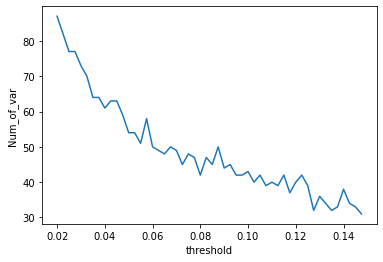

In [63]:
sns.lineplot(data = threshold_df["Num_of_var"])

<AxesSubplot:xlabel='threshold'>

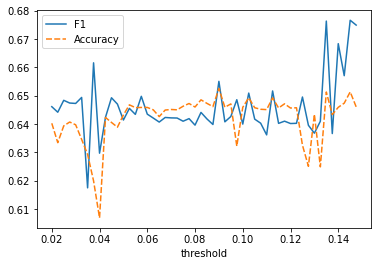

In [64]:
sns.lineplot(data = threshold_df[["F1", "Accuracy"]])

### Después de ver el gráfico, elegimos como threshold= y hacemos el modelo con las variables obtenidas

In [32]:
sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'), threshold = 0.08)
sel_lasso.fit(x_train_scaled, ytrain)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'),
                threshold=0.08)

In [33]:
selected_feat_lasso = x_train_scaled.columns[sel_lasso.get_support()]

In [34]:
model_regression_2 = LogisticRegression(random_state=0)
model_regression_2.fit(x_train_t[selected_feat_lasso], ytrain)

/Users/aitor/opt/anaconda3/envs/core_models/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [35]:
predictions_reg_2 = model_regression_2.predict(x_test_t[selected_feat_lasso])
predictions_reg_2

array([1, 1, 0, ..., 1, 1, 1])

In [36]:
proba_predictions_2 = model_regression_2.predict_proba(x_test_t[selected_feat_lasso])
proba_predictions_2

array([[0.12932803, 0.87067197],
       [0.37201436, 0.62798564],
       [0.66305073, 0.33694927],
       ...,
       [0.35170948, 0.64829052],
       [0.1896383 , 0.8103617 ],
       [0.40162348, 0.59837652]])

In [37]:
print(classification_report(ytest, predictions_reg_2))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     86522
           1       0.65      0.65      0.65     89421

    accuracy                           0.64    175943
   macro avg       0.64      0.64      0.64    175943
weighted avg       0.64      0.64      0.64    175943



In [47]:
f1_score( predictions_reg_2, ytest)

0.6485067426571229